In [1]:
#---------------------------
#--- Paquetes
#---------------------------
import pandas as pd
import seaborn as sns

'''Permite buscar y recuperar una lista de nombres de archivos que coinciden con un patrón específico de nombre
de archivo en un directorio o en una jerarquía de directorios.'''

import glob

import numpy as np
import os
from datetime import datetime, timedelta

import matplotlib.pyplot as plt


/home/sebastian/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#-----------------------------
#--- Sales
#----------------------------

'''archivo csv con la inf de venta historica
este archivo csv es el resultado de unificar todos los xlsx de sharepoint, filtrando las columnas de interes para el modelo'''

ruta=r'/home/sebastian/Documentos/programas/Forescast Work/Sales_History.csv'
df_SalesAndProduct=pd.read_csv(ruta,index_col=None, header=0,dtype=str)

''' 
    Date en formato adecuado
    Elimina espacios en los nombres del col
    Se ordena por Date Country Code Brand
'''
df_SalesAndProduct['Date']=pd.to_datetime(df_SalesAndProduct['Date'],format='%Y-%m-%d')
for col in df_SalesAndProduct.columns:
    df_SalesAndProduct.rename(columns={col: col.strip()}, inplace=True)

df_SalesAndProduct = df_SalesAndProduct.sort_values(by=['Date', 'Country Code', 'Brand'], ascending=[True, False, False])
df_SalesAndProduct['Total Sales']=pd.to_numeric(df_SalesAndProduct['Total Sales'])
df_SalesAndProduct=df_SalesAndProduct[df_SalesAndProduct['Total Sales']>0]

In [3]:
'''Se analiza el % de registros que corresponden a devoluciones, para ver su factibilidad de ser imputados de las series'''

def devolucion(año):
    df_año = df_SalesAndProduct[['Date', 'Total Sales']][df_SalesAndProduct['Date'].dt.year == año]

    # Calcular estadísticas en una sola pasada
    num_reg = len(df_año)
    num_devoluciones = len(df_año[df_año['Total Sales'] < 0])
    venta = df_año['Total Sales'].sum()
    venta_devolucion = df_año[df_año['Total Sales'] < 0]['Total Sales'].sum()
    venta_NoDevolucion = venta - venta_devolucion

    # Imprimir resultados
    print(f'total registros {año}: {num_reg}')
    print(f'num devoluciones {año}: {num_devoluciones}')
    print(f'% devoluciones: {num_devoluciones/num_reg:.3%}')
    print(f'venta total año {año}: {venta}')
    print(f'venta con devoluciones {año}: {venta_devolucion}')
    print(f'venta sin devoluciones {año}: {venta_NoDevolucion}')
    print(f'%venta devolucion: {venta_devolucion/venta:.3%}')
    print(f'%venta sin devolucion: {venta_NoDevolucion/venta:.3%}')

    df_SalesInf=df_SalesAndProduct[['Date','Total Sales']]
    num_reg=len(df_SalesInf)
    num_dev=len(df_SalesInf[df_SalesInf['Total Sales']<0])
    venta=df_SalesInf['Total Sales'].sum()
    venta_Nodevolucion=df_SalesInf[df_SalesInf['Total Sales'] >= 0]['Total Sales'].sum()
    venta_devolucin=venta-venta_Nodevolucion
    print("*------------------------\n")
    print(f'num registros: {num_reg}')
    print(f'num dev:{num_dev}')
    print(f'venta total: {venta}')
    print(f'% dev:{num_dev/num_reg:.3%}')
    print(f'% No dev:{(num_reg-num_dev)/num_reg:.3%}')
    print(f'venta sin devolucion: {venta_Nodevolucion}')
    print(f'venta devolucion: {venta_devolucin}')
    print(f'% venta sin devolucion: {venta_Nodevolucion/venta:.3%}')
    print(f'%venta con devolucion:{venta_devolucin/venta:.3%}')    

In [4]:
devolucion(2024)

total registros 2024: 2024066
num devoluciones 2024: 0
% devoluciones: 0.000%
venta total año 2024: 753852140.2500002
venta con devoluciones 2024: 0.0
venta sin devoluciones 2024: 753852140.2500002
%venta devolucion: 0.000%
%venta sin devolucion: 100.000%
*------------------------

num registros: 6346147
num dev:0
venta total: 2490588689.6899996
% dev:0.000%
% No dev:100.000%
venta sin devolucion: 2490588689.6899996
venta devolucion: 0.0
% venta sin devolucion: 100.000%
%venta con devolucion:0.000%


In [ ]:
'''se leen todos los xlsx de sharepoint, se unifican en un solo df_sales, 
se lee el xlsx de master products
se cruza df_sales con df_products para obtener la clasificacion de los sku con venta'''


#--------------------
# --- SALES 
#--------------------

'''Ruta donde se encuentre la inf de venta'''
paht_data_historica=r'C:\Users\SSN0609\OneDrive - Stanley Black & Decker\Dashboard Marketing\Sales'
#Crea una lst con la ubicacion de los archivos
all_files_sales = glob.glob(paht_data_historica + "/*Sales*.xlsx")
#Filtra los files que son de venta
filtered_files_sales = [file for file in all_files_sales if "path" not in file]

lst_sales=[]
'''Recorre la lista de ubicaciones y lee el xlsx'''
for filename in filtered_files_sales:
    df = pd.read_excel(filename, index_col=None, header=0,dtype=str)
    lst_sales.append(df)
len(lst_sales)

'''Concatena la info de lst_sales(col: inf xlsx) de manera vertical'''
df_sales= pd.concat(lst_sales,axis=0,ignore_index=True)

#--------------------
# --- PRODUCTS 
#--------------------
paht_data_product=r'C:\Users\SSN0609\OneDrive - Stanley Black & Decker\Master Data\Master Data Products Reclasif.xlsx'
df_products=pd.read_excel(paht_data_product,index_col=None,header=0,dtype=str)

#-------------------------------
# --- Eleccion Columnas
#-------------------------------

Columns_products=['SKU', 'SKU Base', 'SKU Description', 'Brand ', 'GPP Division Code',
       'GPP Division Reclasif', 'GPP Category Reclasif', 'GPP Portfolio ',
       'SBU', 'Super SBU', 'GPP SBU', 'GPP SBU Description']
df_products=df_products[Columns_products]

columns_sales=['Fiscal Year', 'Fiscal Period', 'Country Code', 
       'Sold-To Customer Code','Country Material', 'Total Sales', 'Total Cost', 'Units Sold']
df_sales=df_sales[columns_sales]

#-----------------------------
#--- Merge
#-----------------------------

df_SalesAndProduct=pd.merge(
    df_sales,df_products,how='left',left_on='Country Material',right_on='SKU'
)

print(f'len(df_sales): {len(df_sales)}')
print(f'len(df_salesProdu): {len(df_SalesAndProduct)}')

#-------------------------------
#---- Date
#-------------------------------
dict_month={
        'jan':'01',
        'feb':'02',
        'mar':'03',
        'apr':'04',
        'may':'05',
        'jun':'06',
        'jul':'07',
        'aug':'08',
        'sep':'09',
        'oct':'10',
        'nov':'11',
        'dec':'12',
        '1':'01'
    }
def mes(row):
    month = row['Fiscal Period'].lower()
    month_num = dict_month[month]
    year = row['Fiscal Year']
    date_str = month_num + '-' + year
    return date_str

df_SalesAndProduct['Date']=df_SalesAndProduct.apply(mes,axis=1) 
df_SalesAndProduct['Date']=pd.to_datetime(df_SalesAndProduct['Date'],format='%m-%Y')
df_SalesAndProduct.head()

for col in df_SalesAndProduct.columns:
    df_SalesAndProduct.rename(columns={col: col.strip()}, inplace=True)


In [14]:
'''Evaluación del Enfoque y Sugerencias

    Función de Filtrado para Generar Series de Tiempo:
        Comentario: Crear una función que permita generar series de tiempo para un parámetro específico es una excelente idea. Esto te permitirá ver la evolución de las ventas desde perspectivas clave como marca, país o SBU, sin tener que filtrar manualmente.
        Sugerencia de Mejora: Podrías optimizar la función para permitir múltiples filtros, por ejemplo, que acepte un diccionario con varias condiciones ({"brand": "dewalt", "country": "US"}) para flexibilizar los análisis.
        Bonus: Agregar visualizaciones automáticas dentro de la función, como gráficos de líneas, descomposiciones de tendencia, o correlogramas, te dará una visión rápida del comportamiento de cada serie.

    Función para Extraer Métricas Clave de la Serie de Tiempo:
        Comentario: La función que describe los valores importantes (como tendencia, estacionalidad, varianza, autocorrelación, etc.) es fundamental para seleccionar el modelo adecuado.
        Sugerencia de Mejora: Además de devolver métricas clave, podrías considerar agregar un análisis exploratorio automatizado que incluya pruebas estadísticas, como el test de Dickey-Fuller para estacionalidad, y métricas de variabilidad estacional para facilitar la comparación de series entre categorías.
        Bonus: Incluir una clasificación preliminar en función de estas métricas para sugerir directamente un modelo (por ejemplo, si la estacionalidad es fuerte, sugerir SARIMA).

    Función de Modelado Basado en Métricas de la Serie de Tiempo:
        Comentario: Automatizar el ajuste del modelo con base en las características de cada serie de tiempo es un excelente enfoque.
        Sugerencia de Mejora: Considera que, además de seleccionar un modelo, podrías usar una estructura de prueba de múltiples modelos (modelo base + modelo estacional) en paralelo y luego elegir el modelo con menor error de validación.
        Bonus: Además de SARIMA o Prophet, podrías incluir modelos alternativos como TBATS o modelos híbridos (SARIMA + XGBoost) en función de las características, especialmente si tienes datos altamente no lineales.

    Función para Almacenar Predicciones en un DataFrame de Resultados:
        Comentario: La idea de almacenar las predicciones de cada serie de tiempo es excelente para poder consultar los resultados de manera centralizada.
        Sugerencia de Mejora: Podrías organizar el DataFrame para tener un índice multinivel con parámetros como Fiscal Period, Country, Brand, SBU, etc., lo que permitirá filtrar y resumir los resultados fácilmente.
        Bonus: Añadir una columna que indique el error de predicción del modelo para cada serie en el DataFrame de resultados, lo cual permitirá monitorear la precisión de los modelos en el tiempo.

    Función para Generar Matrices Estructuradas (por período fiscal, país, marca, etc.):
        Comentario: Generar matrices estructuradas por características es útil para visualizar los patrones de ventas y, potencialmente, crear correlaciones o relaciones entre variables.
        Sugerencia de Mejora: Asegúrate de que las matrices de datos tengan una estructura consistente (llenando los datos faltantes si es necesario) y considera una agregación preliminar en cada período. Podrías también aprovechar estas matrices para detectar correlaciones interanuales o estacionales entre países y marcas.
        Bonus: En lugar de solo generar la matriz de datos, podrías considerar crear matrices de coeficientes de correlación dinámicas que puedan usarse como input para ajustar modelos combinados.

    Función para el Análisis de Correlación entre Variables:
        Comentario: Evaluar la correlación entre las variables y promediar modelos para las variables altamente correlacionadas es una estrategia sólida para evitar duplicidad en los resultados.
        Sugerencia de Mejora: Podrías definir un umbral de correlación para decidir qué variables se consideran "altamente correlacionadas" y asegurarte de aplicar el promedio de modelos solo en aquellas variables donde la correlación supera este umbral.
        Bonus: En lugar de promediar modelos, podrías optar por modelos de ensamble (ensemble models) donde los modelos de las variables correlacionadas aporten predicciones ponderadas, maximizando la precisión para categorías similares.
'''


'Evaluación del Enfoque y Sugerencias\n\n    Función de Filtrado para Generar Series de Tiempo:\n        Comentario: Crear una función que permita generar series de tiempo para un parámetro específico es una excelente idea. Esto te permitirá ver la evolución de las ventas desde perspectivas clave como marca, país o SBU, sin tener que filtrar manualmente.\n        Sugerencia de Mejora: Podrías optimizar la función para permitir múltiples filtros, por ejemplo, que acepte un diccionario con varias condiciones ({"brand": "dewalt", "country": "US"}) para flexibilizar los análisis.\n        Bonus: Agregar visualizaciones automáticas dentro de la función, como gráficos de líneas, descomposiciones de tendencia, o correlogramas, te dará una visión rápida del comportamiento de cada serie.\n\n    Función para Extraer Métricas Clave de la Serie de Tiempo:\n        Comentario: La función que describe los valores importantes (como tendencia, estacionalidad, varianza, autocorrelación, etc.) es fundam

In [6]:
df_SalesAndProduct.columns


Index(['Fiscal Year', 'Fiscal Period', 'Country Code', 'Sold-To Customer Code',
       'Country Material', 'Total Sales', 'Total Cost', 'Units Sold', 'SKU',
       'SKU Base', 'SKU Description', 'Brand', 'GPP Division Code',
       'GPP Division Reclasif', 'GPP Category Reclasif', 'GPP Portfolio',
       'SBU', 'Super SBU', 'GPP SBU', 'GPP SBU Description', 'Date'],
      dtype='object')

In [7]:
#---------------------------------------
#---- Creacion series de tiempo
#---------------------------------------


def generar_serie_tiempo(df, filtros):
    """
    Filtra los datos de ventas según los filtros especificados y devuelve una serie de tiempo.
    Args:
        df (pd.DataFrame): DataFrame con datos de ventas.
        filtros (dict): Diccionario de condiciones para filtrar.
    Returns:
        pd.Series: Serie de tiempo de ventas filtrada.
    """
    for clave, valor in filtros.items():
        df = df[df[clave] == valor]
    serie = df.set_index('Date')['Total Sales']
    return serie

In [24]:
filtros={
'Brand':[''],
'Country Code':[''],
'GPP Division Code':[]

}
serie=generar_serie_tiempo(df_SalesAndProduct,{'Country Code':'Mexico'})
serie

Date
2022-01-01    4968.23
2022-01-01      83.35
2022-01-01     398.67
2022-01-01    8696.42
2022-01-01      91.35
               ...   
2024-10-01      70.51
2024-10-01      69.78
2024-10-01     147.71
2024-10-01      56.18
2024-10-01      24.86
Name: Total Sales, Length: 388659, dtype: float64

In [9]:
len(serie[serie< 0])

0

In [25]:
import statsmodels.api as sm

def extraer_metrica_serie_tiempo(serie):
    descomposicionAdd = sm.tsa.seasonal_decompose(serie, model='additive', period=12)
   # log_ventas = np.log(serie["Total Sales"])
    descomposicionMul = sm.tsa.seasonal_decompose(serie, model='multiplicative', period=12)

    return {
        "Mod Add tendencia": descomposicionAdd.trend.mean(),
        "Mod Add estacionalidad": descomposicionAdd.seasonal.mean(),
        "Mod Add ruido": descomposicionAdd.resid.mean(),
        "Mod Mul tendencia": descomposicionMul.trend.mean(),
        "Mod Mul estacionalidad": descomposicionMul.seasonal.mean(),
        "Mod Mul ruido": descomposicionMul.resid.mean(),
        
        "ADF Test": sm.tsa.adfuller(serie)[1]    # p-value
    }

In [22]:
extraer_metrica_serie_tiempo(serie)

{'Mod Add tendencia': 50.42174670072371,
 'Mod Add estacionalidad': 0.002757802379679258,
 'Mod Add ruido': 0.0017928199700257817,
 'Mod Mul tendencia': 50.42174670072371,
 'Mod Mul estacionalidad': 1.000001949039575,
 'Mod Mul ruido': 0.981943290587962,
 'ADF Test': 8.05589730726992e-26}

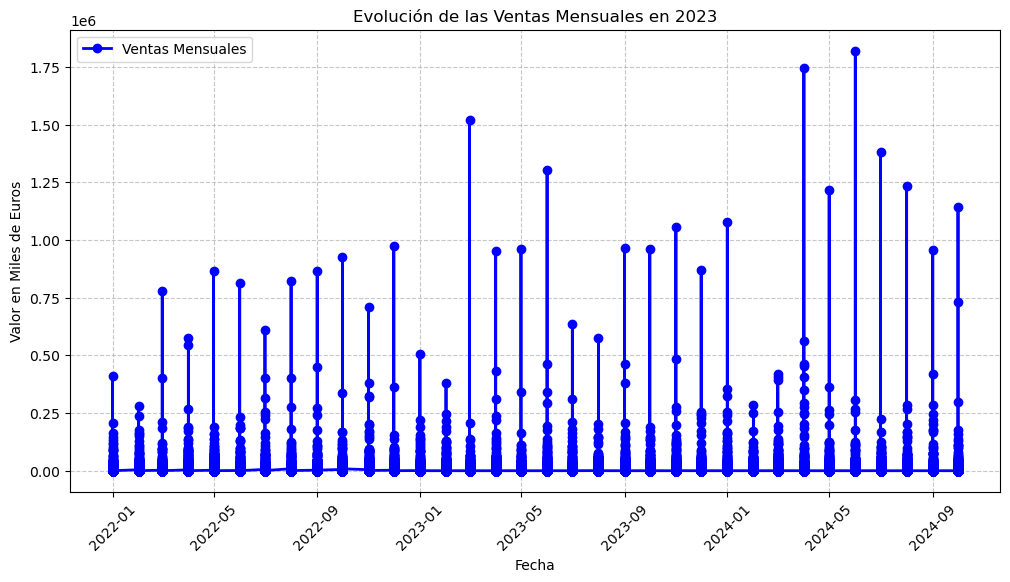

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(serie, color='blue', linewidth=2, marker='o', label='Ventas Mensuales')
plt.title('Evolución de las Ventas Mensuales en 2023')
plt.xlabel('Fecha')
plt.ylabel('Valor en Miles de Euros')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

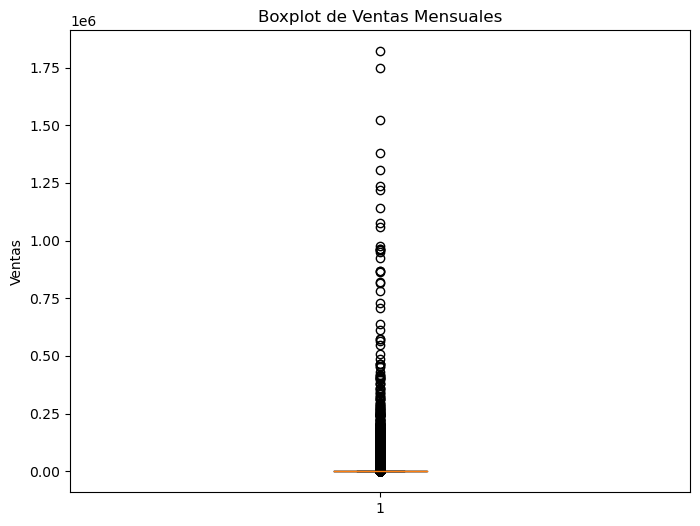

In [30]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(serie)
plt.title('Boxplot de Ventas Mensuales')
plt.ylabel('Ventas')
plt.show()

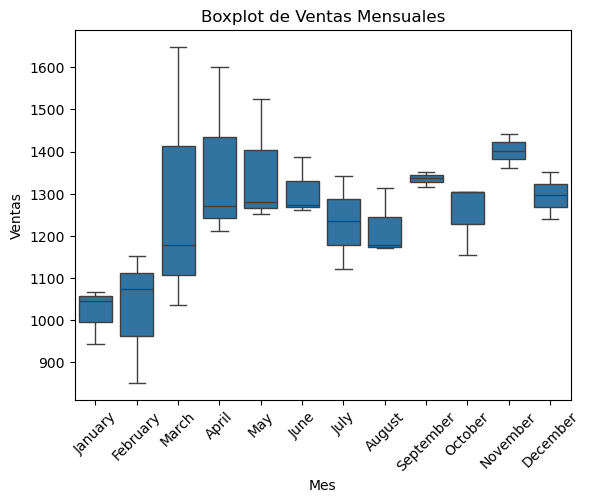

In [35]:
# Convertir la serie a DataFrame (si aún no lo es)
df = serie.to_frame()

# Resamplear los datos por mes (ajusta según tu necesidad)
df_mensual = df.resample('M').mean()

# Crear el boxplot
sns.boxplot(x=df_mensual.index.month_name(), y='Total Sales', data=df_mensual)
plt.title('Boxplot de Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

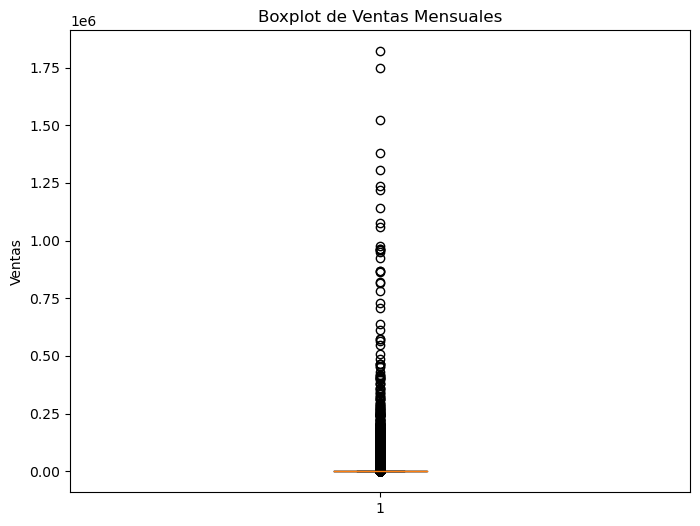

Valores Atípicos (Outliers):

Date
2022-01-01    4968.23
2022-01-01    8696.42
2022-01-01    2924.64
2022-01-01    5337.24
2022-01-01    1807.57
               ...   
2024-10-01    6124.36
2024-10-01    1765.19
2024-10-01    3962.79
2024-10-01    5709.71
2024-10-01    5468.89
Name: Total Sales, Length: 49922, dtype: float64


In [36]:
# Create a boxplot and extract outlier information
plt.figure(figsize=(8, 6))
plt.boxplot(serie)
plt.title('Boxplot de Ventas Mensuales')
plt.ylabel('Ventas')
plt.show()

# Calculate quartiles and IQR
Q1 = serie.quantile(0.25)
Q3 = serie.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = serie[(serie < lower_bound) | (serie > upper_bound)]

print("Valores Atípicos (Outliers):\n")
print(outliers)